Consider an Ito process with drift $\mu=0.8$ and diffusion coefficient $\sigma=0.4$.

$$dY = \mu dt + \sigma dW$$

  * Determine the appropriate transformation, according to the Girsanov theorem, which makes the original process driftless.
  * Verify that applying the Radon-Nikodym to the a simulated path of the process the drift indeed disappear.

First simulate $N=10000$ realizations of a Brownian Motion ($W$) and a of an Ito process ($Y$).

In [ ]:
import numpy as np

T = 1
M = 252
dt = T/M
N = 100000
mu = 0.8
sigma = 0.4

#np.random.seed(1000)
epsilon = np.zeros(shape=(M, N))
for i in range(N):
  epsilon[1:, i] = np.random.normal(size=M-1)

dW = np.zeros_like(epsilon)
dW[1:, :] = sigma*np.sqrt(dt)*epsilon[1:, :]
W = np.cumsum(dW, axis=0)
dY = np.zeros_like(epsilon)
dY[1:, :] = mu*dt + sigma*np.sqrt(dt)*epsilon[1:, :]
Y = np.cumsum(dY, axis=0)

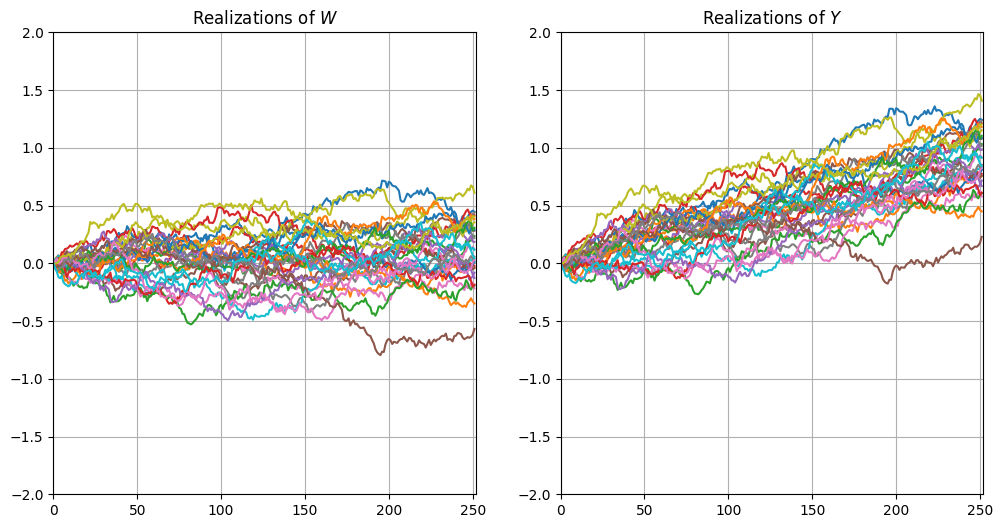

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)

plt.subplot(1,2,1)
plt.plot(W[:, :30])
plt.grid(True)
plt.ylim(-2, 2)
plt.xlim(0, M)
plt.title("Realizations of $W$")

plt.subplot(1,2,2)
plt.plot(Y[:, :30])
plt.grid(True)
plt.ylim(-2, 2)
plt.xlim(0, M)
plt.title("Realizations of $Y$")

plt.show()

According to the Girsanov Theorem the Radon-Nikodym is defined as
$$\cfrac{d\mathbb{Q}}{d\mathbb{P}} = \exp\left(-\frac{1}{2}\int_0^t\gamma_s^2 ds + \int_0^t\gamma_s dW_s\right)$$

In this case $\gamma_t = \cfrac{-\mu}{\sigma}$.

We saw that RN probability distribution tended to assign higher weights to negative values, thus reducing the resulting drift of the process.

Using the Radon-Nikodym derivative defined above it is possible to verify the Girsanov theorem, in particular:
  * the original and the transformed process have the same evolution ($\sigma$ is unchanged in the transformation);
  * $\mathbb{E}[YQ] = 0$ so the new process is driftless.  

Define the $RN$ process according to the Girsanov theorem and compute $\mathbb{E}$ and standard deviation for the process $Y$ in the original measure and in the new one (using the Radon-Ninkodym derivative).

In [ ]:
# Radon-Nikodym process
RN = np.ones_like(epsilon)
gamma = -mu/sigma
RN[1:, :] = np.exp(gamma*dY[1:, :]/sigma - 0.5*gamma**2*dt)
YQ = np.cumsum(dY*RN, axis=0)

Y_mean_P = np.mean(Y, axis=1)
Y_std_P = np.std(Y, axis=1)
Y_mean_Q = np.mean(YQ, axis=1)
Y_std_Q = np.std(YQ, axis=1)

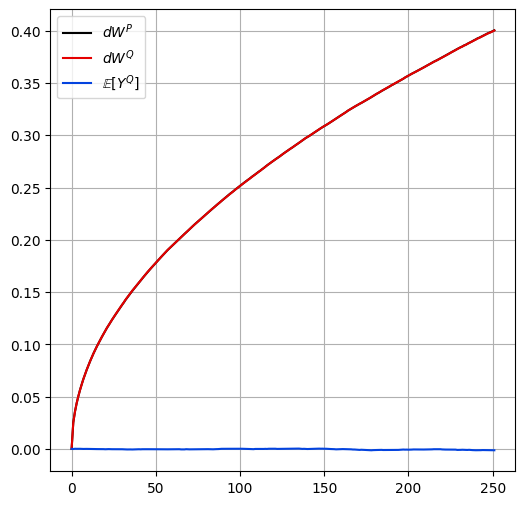

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 6)
plt.plot(Y_std_P, color="black", label='$dW^{P}$')
plt.plot(Y_std_Q, color="xkcd:red", label='$dW^{Q}$')
plt.plot(Y_mean_Q, color="xkcd:blue", label='$\mathbb{E}[Y^{Q}]$')
plt.grid(True)
plt.legend()
plt.show()

Finally we can take a realization of $Y$ and check how it is transformed by changing the measure.

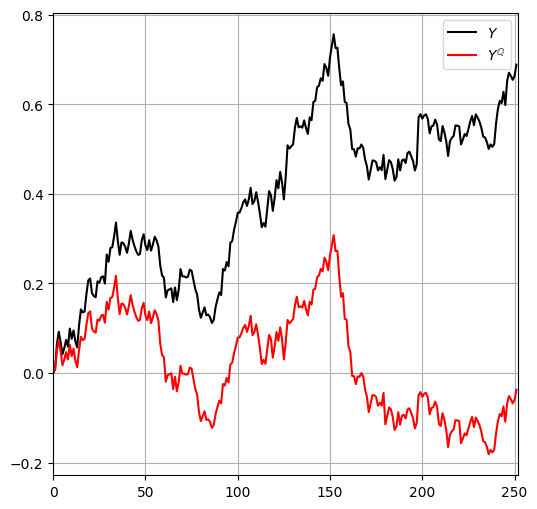

In [ ]:
idx = 40
plt.plot(Y[:, idx], color='black', label="$Y$")
plt.plot(YQ[:, idx], color='red', label="$Y^{\mathbb{Q}}$")

plt.xlim(0, M)
plt.grid(True)
plt.legend()
plt.show()

Given an underlying asset $S$ which currently is valued 100 simulate $N$ possible realization of the random variable $S$ both under the *physical* probability measure and the in the *risk-neutral measure*.

Consider also a 1 year call option on that asset with strike $K=120$ determine and compare its value obtanined using Monte Carlo simulation with dynamics in both measures.


In [53]:
import numpy as np

mu = 0.05
r = 0.01
sigma = 0.20
gamma = (mu-r)/sigma
S0 = 100
K = 120
T = 1
M = 365
dt = T/M
N = 100000

#np.random.seed(1)

In [54]:
dW = np.sqrt(dt)*np.random.normal(size=N*M).reshape(M, N)

SP = np.zeros_like(dW)
SP[0, :] = S0
for t in range(1, M):
  SP[t, :] = SP[t-1, :] + mu*dt*SP[t-1, :] + sigma*SP[t-1, :]*dW[t-1, :]

SP_exp = np.mean(SP, axis=1)

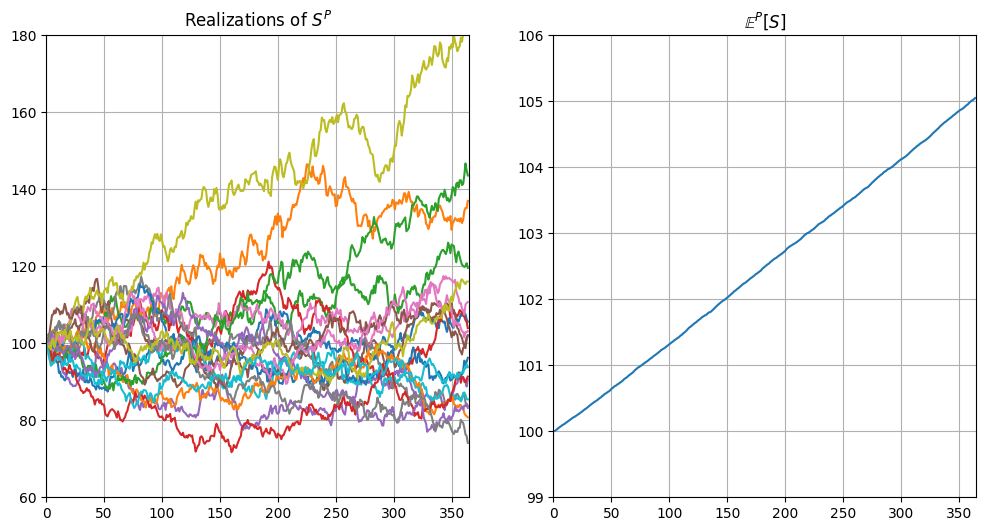

In [57]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)
plt.subplot(1,2,1)
plt.plot(SP[:, :20])
plt.grid(True)
plt.xlim(0, M)
plt.ylim(60, 180)
plt.title("Realizations of $S^P$")

plt.subplot(1,2,2)
plt.plot(SP_exp)
plt.grid(True)
plt.xlim(0, M)
plt.ylim(99, 106)
plt.title("$\mathbb{E}^P[S]$")
plt.show()

In [58]:
SQ = np.zeros_like(dW)
SQ[0, :] = S0
for t in range(1, M):
  SQ[t, :] = SQ[t-1, :] + r*dt*SQ[t-1, :] + sigma*SQ[t-1, :]*dW[t-1, :]

SQ_exp = np.mean(SQ, axis=1)

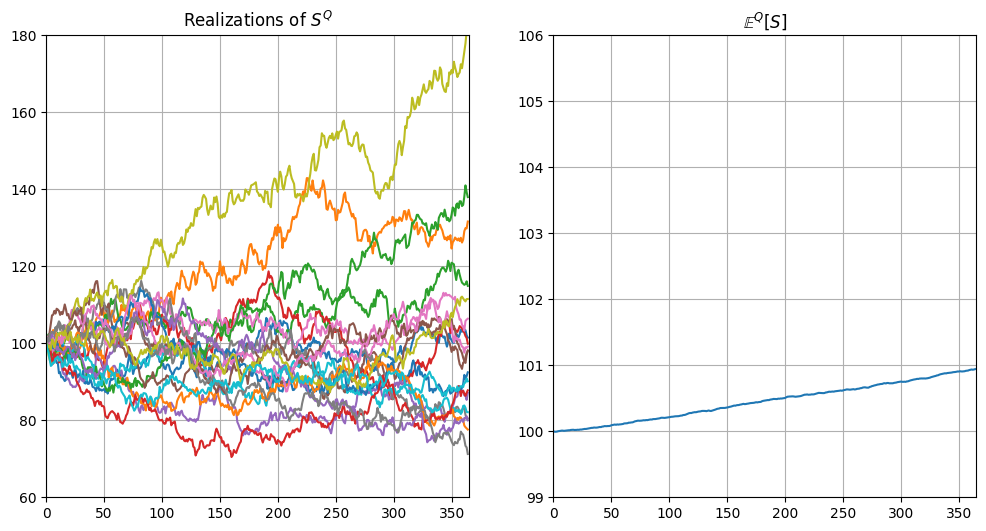

In [60]:
plt.rcParams['figure.figsize'] = (12,6)
plt.subplot(1,2,1)
plt.plot(SQ[:, :20])
plt.grid(True)
plt.xlim(0, M)
plt.ylim(60, 180)
plt.title("Realizations of $S^Q$")

plt.subplot(1,2,2)
plt.plot(SQ_exp)
plt.grid(True)
plt.xlim(0, M)
plt.ylim(99, 106)
plt.title("$\mathbb{E}^Q[S]$")
plt.show()

In [61]:
RN = np.ones_like(dW)
for t in range(1, M):
  RN[t, :] = np.exp(-gamma*dW[t, :] - 0.5*gamma**2*dt)

Sanity check: verify that $\mathbb{E}[RN]=1$.

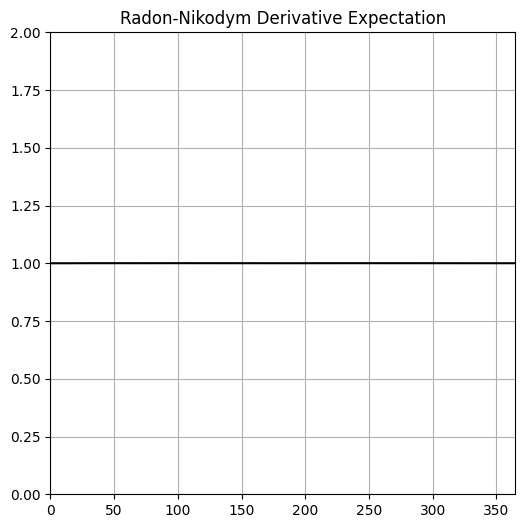

In [62]:
plt.rcParams['figure.figsize'] = (6,6)
plt.plot(np.mean(np.cumprod(RN, axis=0), axis=1), color='black')
plt.ylim(0, 2)
plt.xlim(0, 365)
plt.grid(True)
plt.title("Radon-Nikodym Derivative Expectation")
plt.show()

Finally compute the option value under the two measures.

In [63]:
RN = np.ones_like(dW)
for t in range(1, M):
  RN[t, :] = np.exp(-gamma*dW[t, :] - 0.5*gamma**2*dt)

CQ = np.exp(-r*T)*np.maximum((SQ[-1, :]-K), 0)
print (f"Price under Q: {np.mean(CQ):.2f}")

CP_RN = np.exp(-r*T)*np.maximum((SP[-1, :]-K), 0)*np.cumprod(RN, axis=0)[-1, :]
print (f"Price under Q (via RN): {np.mean(CP_RN):.2f}")

Price under Q: 2.31
Price under Q (via RN): 2.30
